# Question

 # Importing package and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/ADMIN/Downloads/Telegram Desktop/vinsup/Python_jupyter/train.csv')
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 1. History for numeric columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe(include=["int64","float64"]).astype(int)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891,891,891,714,891,891,891
mean,446,0,2,29,0,0,32
std,257,0,0,14,1,0,49
min,1,0,1,0,0,0,0
25%,223,0,2,20,0,0,7
50%,446,0,3,28,0,0,14
75%,668,1,3,38,1,0,31
max,891,1,3,80,8,6,512


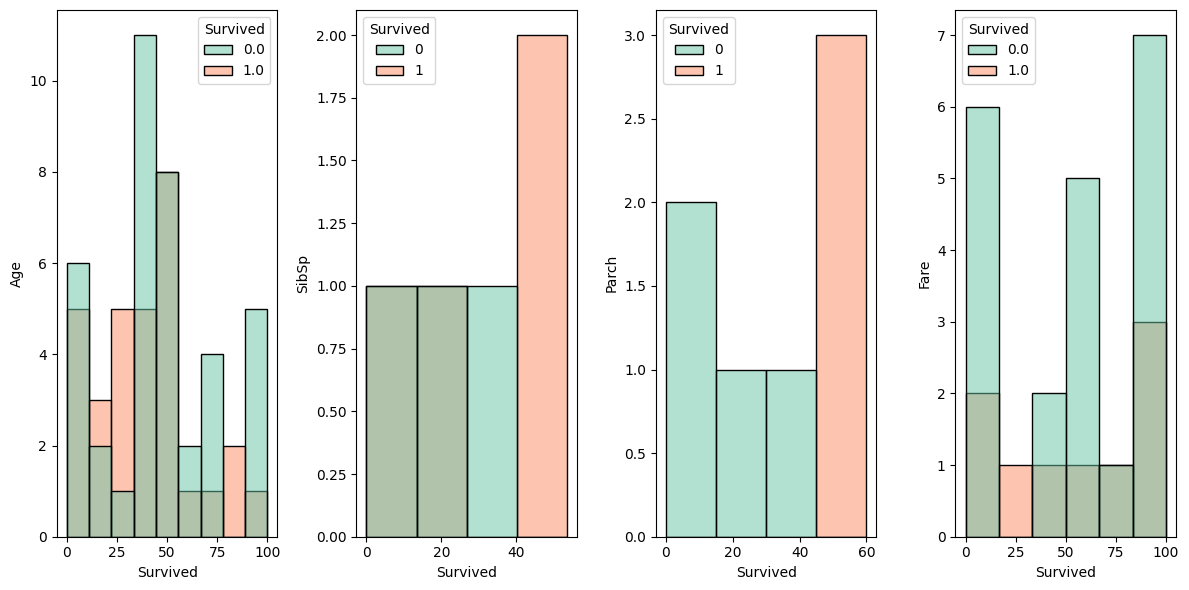

In [29]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_cols.remove('PassengerId') 
numeric_cols.remove('Survived')
numeric_cols.remove('Pclass')

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    survival_rate = df.groupby(col)['Survived'].mean() * 100
    sns.histplot(x=survival_rate, hue='Survived', data=df, palette='Set2', kde=False)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# 2. count plot for categorical columns

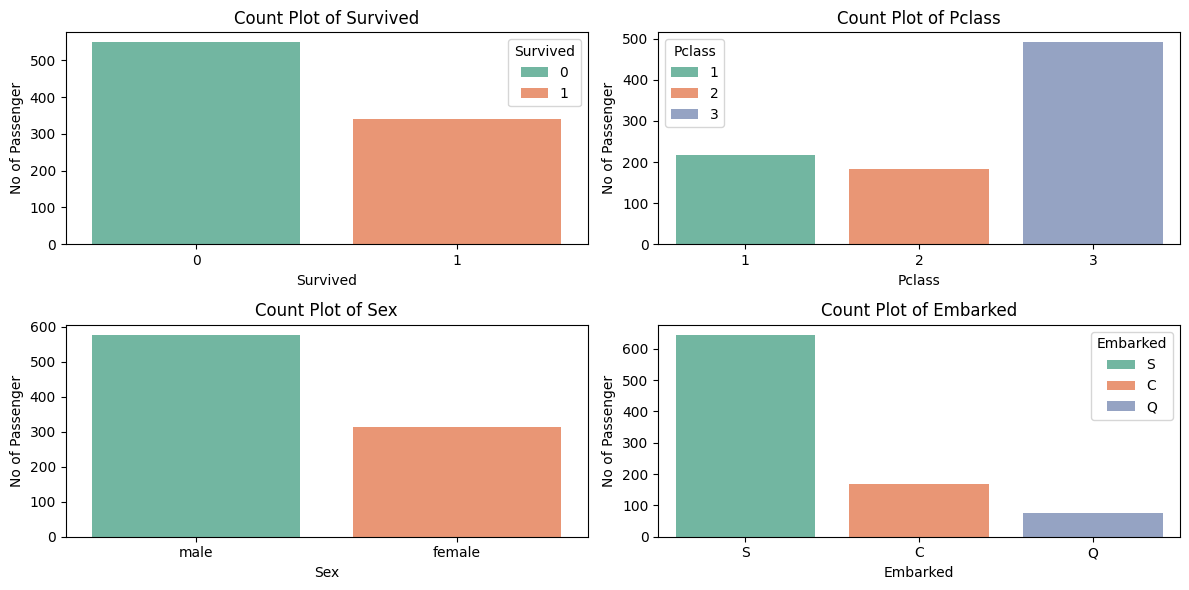

In [9]:
category = ['Survived', 'Pclass', 'Sex', 'Embarked']

plt.figure(figsize=(12, 6))
for i, col in enumerate(category, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col,hue=col, data=df, palette='Set2')
    plt.ylabel('No of Passenger')
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

 3. boxplots survival vs numeric columns

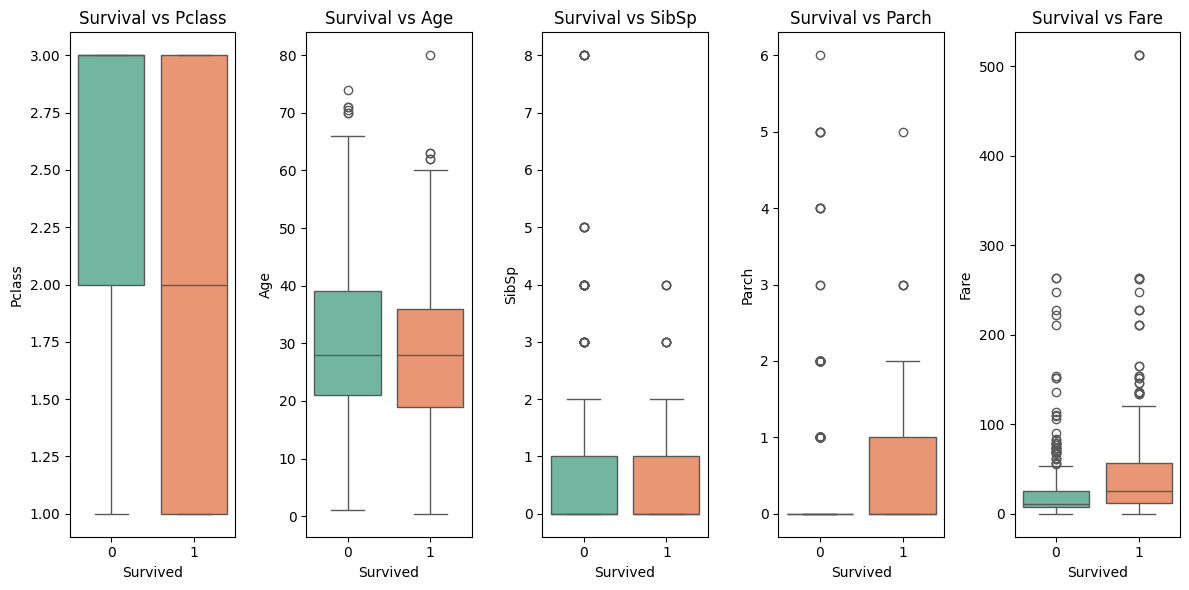

In [7]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_cols.remove('PassengerId') 
numeric_cols.remove('Survived')    

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(x='Survived', y=col, data=df,hue='Survived', palette='Set2')
    plt.title(f'Survival vs {col}')
    plt.legend([],[],frameon=False)

plt.tight_layout()
plt.show()

 4. scatter plot pairwises survival visualization

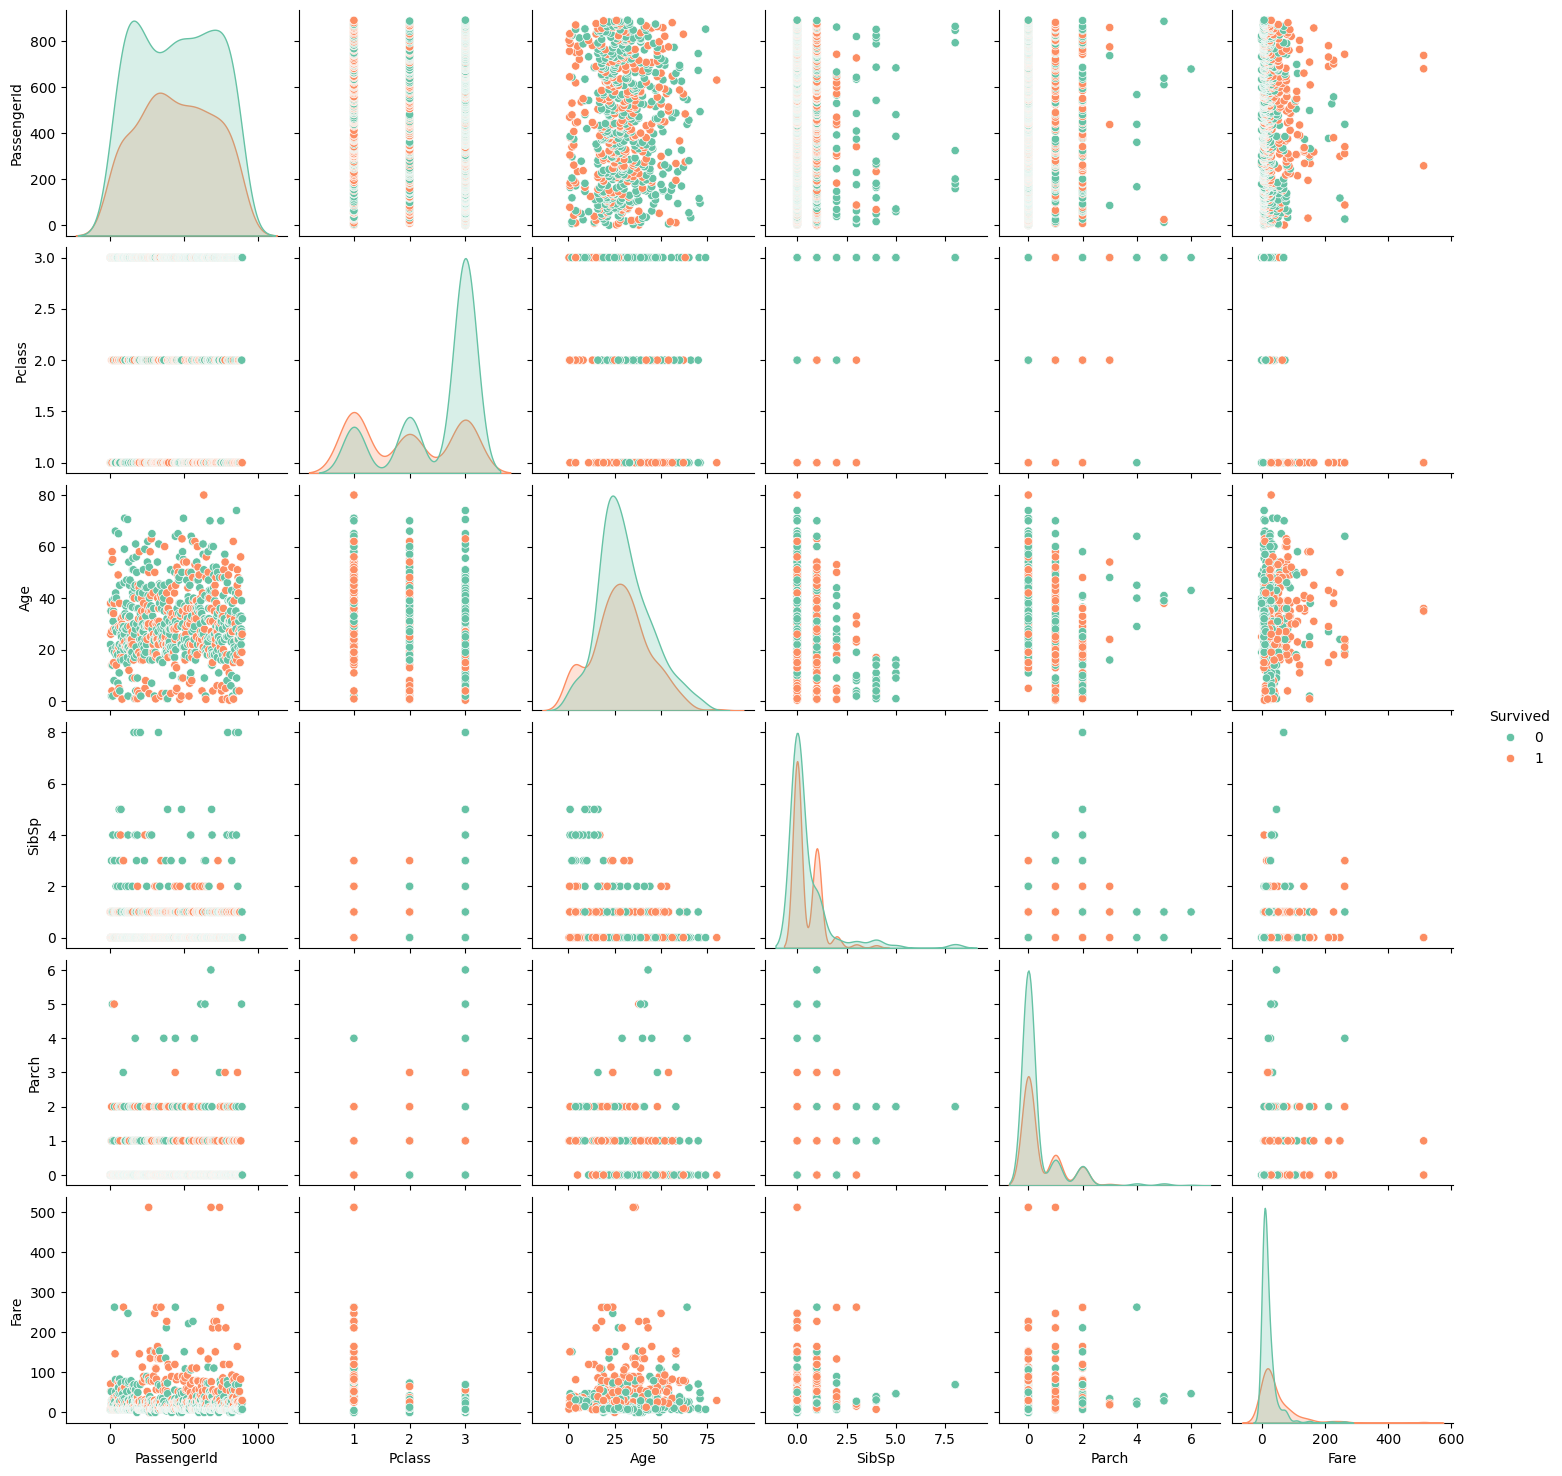

In [8]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
sns.pairplot(df[numeric_cols], palette='Set2',hue='Survived', diag_kind='kde')
plt.show()

 5. survival rate by category

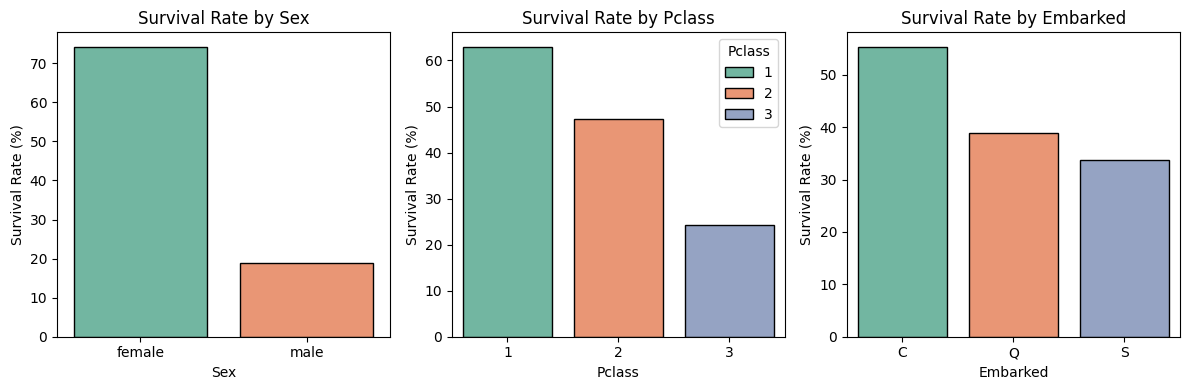

In [10]:
category_1 = ['Sex', 'Pclass', 'Embarked']

plt.figure(figsize=(12, 4))

for i, col in enumerate(category_1, 1):
    plt.subplot(1, 3, i)
    
    survival_rate = df.groupby(col)['Survived'].mean() * 100
    
    sns.barplot(x=survival_rate.index, y=survival_rate.values,hue=survival_rate.index, palette='Set2', edgecolor='black')

    plt.title(f'Survival Rate by {col}')
    plt.ylabel('Survival Rate (%)')
    

plt.tight_layout()
plt.show()

 6. correlation heat map 

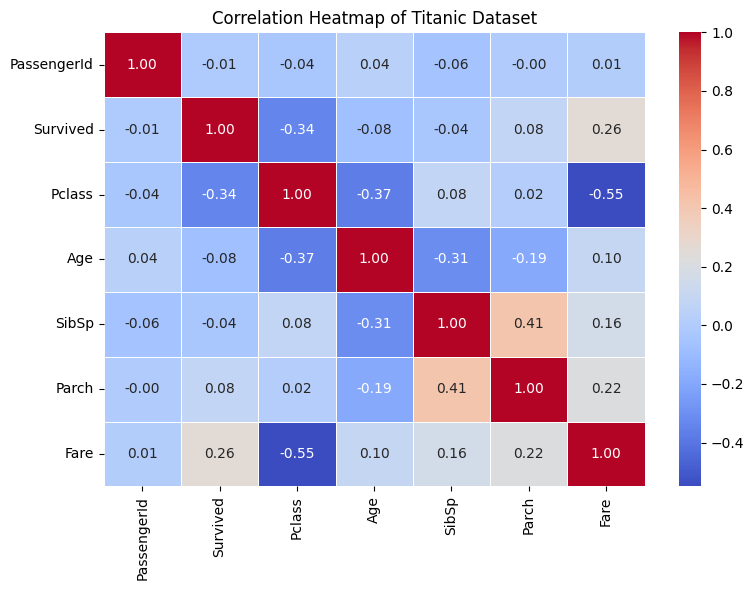

In [7]:
numeric_df = df.select_dtypes(include=["int64","float64"])

corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset')
plt.tight_layout()
plt.show()


 7. Missing Values

In [88]:
a=df.shape

print("Total Rows :",a[0],"\nTotal Columns:",a[1])
print()
print("Missing Values:")

for i in df:
    b=df[i].isnull().sum()
    if b != 0:
        print(f"{i} --> {b} missing values")

Total Rows : 891 
Total Columns: 12

Missing Values:
Age --> 177 missing values
Cabin --> 687 missing values
Embarked --> 2 missing values


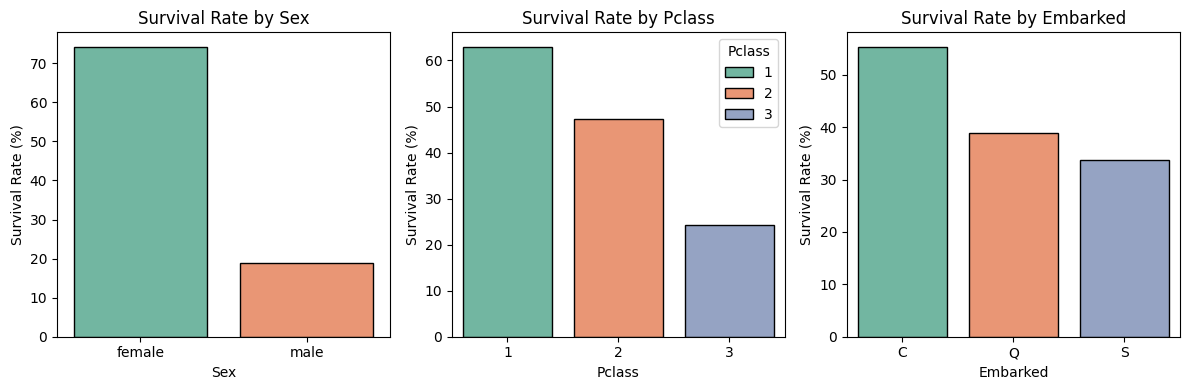

In [20]:
category_1 = ['Sex', 'Pclass', 'Embarked']

plt.figure(figsize=(12, 4))
for i, col in enumerate(category_1, 1):
    
    survival_rate = df.groupby(col)['Survived'].mean() * 100
  
    plt.subplot(1, 3, i)

    sns.barplot(x=survival_rate.index, y=survival_rate.values,hue=survival_rate.index, palette='Set2', edgecolor='black')

    plt.title(f'Survival Rate by {col}')
    plt.ylabel('Survival Rate (%)')
    

plt.tight_layout()
plt.show()